In [1]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                            n_classes=2,n_clusters_per_class=1, random_state=41, hypercube = False, class_sep=10)

In [6]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [2]:
import matplotlib.pyplot as plt

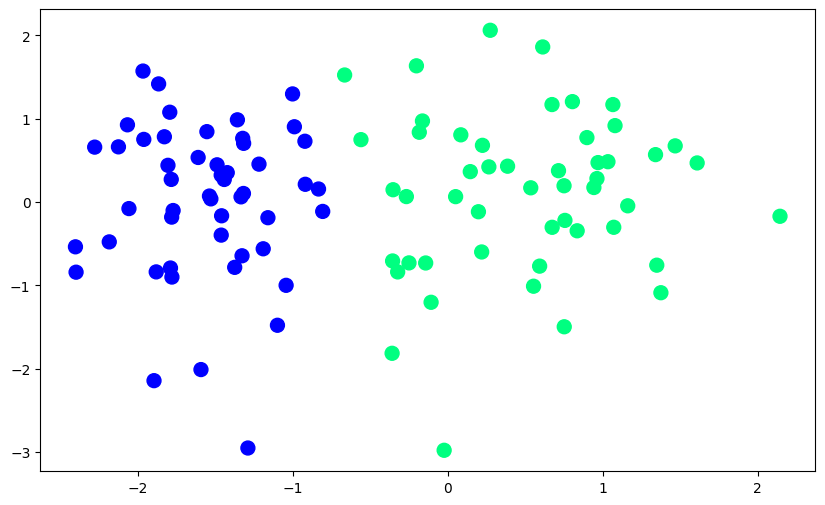

In [3]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [13]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

# So what we do here is at first we insert 1 at the start of the X as X is the coordinates and we are doing this for the bias term
# Now we create an array called weights filled with 1s and its size is X.shape[1] and that is 3 now so at start our weights are init to 1 all of them
# then we init learning rate with lr = 0.1
# Now we generate a random number between 0 and 100 coz our dataset that we have generate has 100 rows and this is for randomly selecting a datapoint
# Now we are checking using the dot products that the point lies on the positive side or negative and that will be our prediction y_hat
# We now know what could be the prediction using the dor product method and we also know what is the actual value of the target 
# Now we simply apply the algorithm that we have studied. Note that step function is written below 
# step(0.298) = 1 while step(-0.298) = 0
# We return the weights now as intercept wala term and the rest is our coefficient

In [14]:
def step(z):
    return 1 if z>0 else 0

In [15]:
intercept_, coef_ = perceptron(X,y)

In [16]:
print(coef_)
print(intercept_)

[1.40801652 0.04766294]
0.9


In [19]:
# Now we just changed Ax+By+C to y = mx+b
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [21]:
x_input = np.linspace(-3,3,1000)
y_input = m*x_input + b

(-3.0, 2.0)

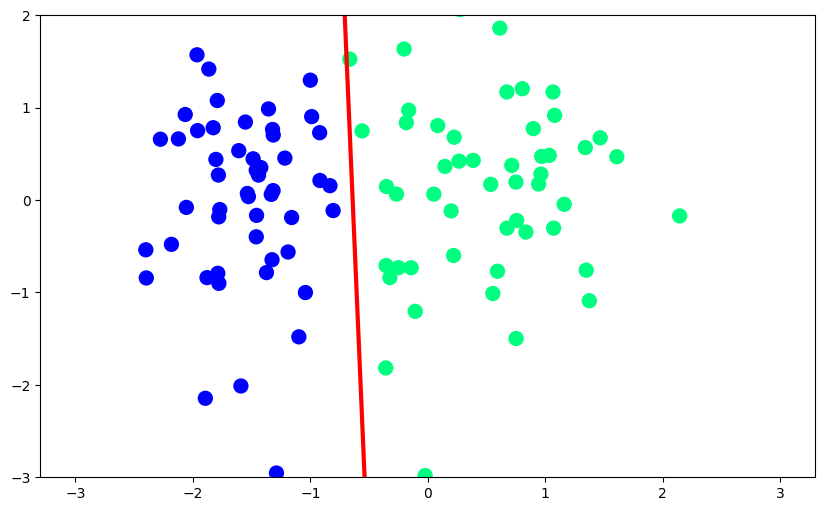

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)